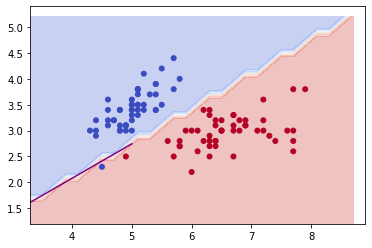

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df['target'] = iris.target
df = df[(df['target'] == 2)|(df['target'] == 0)]
X = df[[0, 1]].values
Y = df['target']
fig, ax = plt.subplots()
clf2 = svm.LinearSVC(C=1).fit(X, Y)
w = clf2.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf2.intercept_[0]) / w[1]
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx2, yy2 = np.meshgrid(np.arange(x_min, x_max, .2),
                     np.arange(y_min, y_max, .2))
Z = clf2.predict(np.c_[xx2.ravel(), yy2.ravel()])

Z = Z.reshape(xx2.shape)
ax.contourf(xx2, yy2, Z, cmap=plt.cm.coolwarm, alpha=0.3)

ax.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.coolwarm, s=25)
ax.plot(xx,yy, color = 'purple')
ax.axis([x_min, x_max,y_min, y_max])
plt.show()

Linearly Seperable

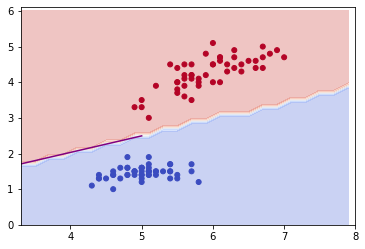

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df['target'] = iris.target
df = df[(df['target'] == 0)|(df['target'] == 1)]
X = df[[0, 2]].values
Y = df['target']

fig, ax = plt.subplots()
clf2 = svm.LinearSVC(C=1).fit(X, Y)
w = clf2.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf2.intercept_[0]) / w[1]
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx2, yy2 = np.meshgrid(np.arange(x_min, x_max, .2),
                     np.arange(y_min, y_max, .2))
Z = clf2.predict(np.c_[xx2.ravel(), yy2.ravel()])

Z = Z.reshape(xx2.shape)
ax.contourf(xx2, yy2, Z, cmap=plt.cm.coolwarm, alpha=0.3)

ax.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.coolwarm, s=25)
ax.plot(xx,yy, color = 'Purple')
ax.axis([x_min, x_max,y_min, y_max])
plt.show()

Non Linearly Seperable

[5.1 1.4 0.2]


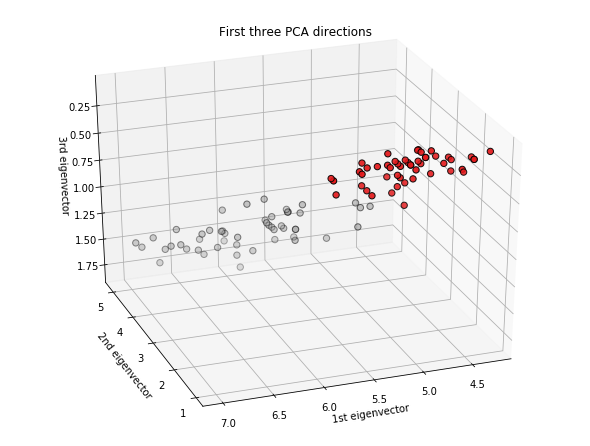

In [66]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df['target'] = iris.target
df = df[(df['target'] == 0)|(df['target'] == 1)]
X = df[[0, 2, 3]].values
print(X[0])
Y = df['target'].values
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=Y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.set_ylabel("2nd eigenvector")
ax.set_zlabel("3rd eigenvector")
plt.show()

[5.1 1.4 0.2]


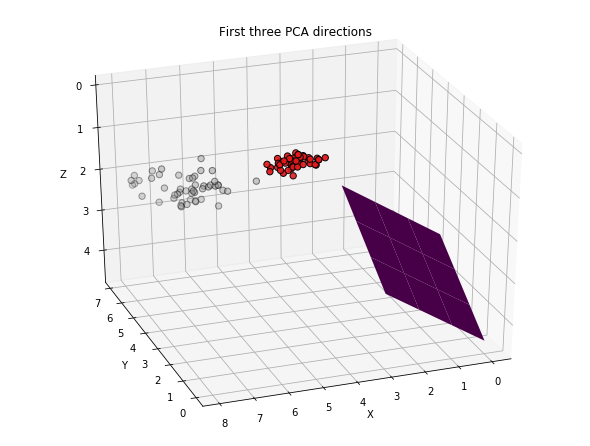

In [65]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np 
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df['target'] = iris.target
df = df[(df['target'] == 0)|(df['target'] == 2)]
X = df[[0, 2, 3]].values
print(X[0])
Y = df['target'].values
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=Y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
point  = np.array([1, 2, 3])
normal = np.array([1, 1, 2])
d = -point.dot(normal)
xx, yy = np.meshgrid(range(4), range(4))
z = (-normal[0] * xx - normal[1] * yy - d) * 1. /normal[2]
ax.plot_surface(xx, yy, z, color = 'purple')
plt.show()

2 features


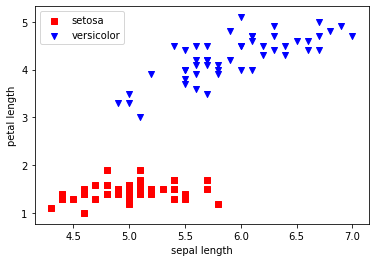

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from mlxtend.classifier import Adaline
class Perceptron(object):
   def __init__(self, rate = 0.01, niter = 10):
      self.rate = rate
      self.niter = niter
   def fit(self, X, y):
      self.weight = np.zeros(1 + X.shape[1])
      self.errors = []  
      for i in range(self.niter):
         err = 0
         for xi, target in zip(X, y):
            delta_w = self.rate * (target - self.predict(xi))
            self.weight[1:] += delta_w * xi
            self.weight[0] += delta_w
            err += int(delta_w != 0.0)
         self.errors.append(err)
      return self
   def net_input(self, X):
      return np.dot(X, self.weight[1:]) + self.weight[0]
   def predict(self, X):
      return np.where(self.net_input(X) >= 0.0, 1, -1)
class AdalineGD(object):
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    def activation(self, X):
        return self.net_input(X)
    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-versicolor', -1, 1)
X = df.iloc[0:100, [0,2]].values
print('2 features')
plt.scatter(X[:50, 0], X[:50, 1],
             color='red', marker='s', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
             color='blue', marker='v', label='versicolor')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc='upper left')
plt.show()

In [70]:
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0,2]].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
ppn = Perceptron()
ppn.fit(X_train, y_train)
y_pred = ppn.predict(X_test)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
ppn=Perceptron()
ppn.fit(X_train_std, y_train)

Wrong Classifications vs epochs graph for perceptron


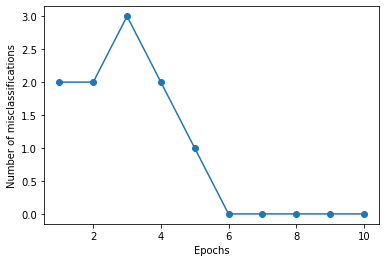

In [71]:
print('Wrong Classifications vs epochs graph for perceptron')
pn = Perceptron()
pn.fit(X, y)
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of Wrong Classifications')
plt.show()

Difference between Perceptron and Adaline for 2 features

In [72]:
print('Perceptron\n\nwrongly classified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Confusion matrix: \n%s' % confusion_matrix(y_test, y_pred))
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-versicolor', 0, 1)
X = df.iloc[0:100, [0,2]].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
ppn = Adaline(epochs=20,eta=0.1, random_seed=1)
ppn.fit(X_train, y_train)
y_pred = ppn.predict(X_test)
print('\nAdaline\n\nwrongly classified: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Confusion matrix: \n%s' % confusion_matrix(y_test, y_pred))

Perceptron

wrongly classified samples: 0
Accuracy: 1.00
Confusion matrix: 
[[15  0]
 [ 0 15]]

Adaline

wrongly classified: 0
Accuracy: 1.00
Confusion matrix: 
[[15  0]
 [ 0 15]]


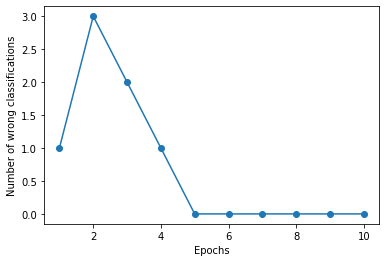

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
class Perceptron(object):
   def __init__(self, rate = 0.01, niter = 10):
      self.rate = rate
      self.niter = niter
   def fit(self, X, y):
      self.weight = np.zeros(1 + X.shape[1])
      self.errors = [] 
      for i in range(self.niter):
         err = 0
         for xi, target in zip(X, y):
            delta_w = self.rate * (target - self.predict(xi))
            self.weight[1:] += delta_w * xi
            self.weight[0] += delta_w
            err += int(delta_w != 0.0)
         self.errors.append(err)
      return self
   def net_input(self, X):
      return np.dot(X, self.weight[1:]) + self.weight[0]
   def predict(self, X):
      return np.where(self.net_input(X) >= 0.0, 1, -1)
class AdalineGD(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    def activation(self, X):
        return self.net_input(X)
    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-versicolor', -1, 1)
X = df.iloc[0:100, [0,1,2]].values
pn = Perceptron()
pn.fit(X, y)
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of wrong classifications')
plt.show()

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
ppn = Perceptron()
ppn.fit(X_train, y_train)
y_pred = ppn.predict(X_test)
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-versicolor', 0, 1)
X = df.iloc[0:100, [0,1,2]].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from mlxtend.classifier import Adaline
ppn = Adaline(epochs=20,eta=0.1, random_seed=1)
ppn.fit(X_train, y_train)
y_pred = ppn.predict(X_test)

3 features


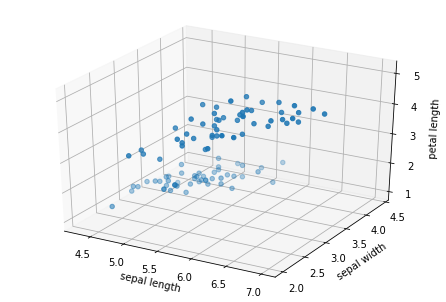

In [2]:
print('3 features')
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df.iloc[0:100, [0]].values, df.iloc[0:100, [1]].values, df.iloc[0:100, [2]].values)
ax.set_xlabel('sepal length')
ax.set_ylabel('sepal width')
ax.set_zlabel('petal length')
plt.show()

In [48]:
print('Perceptron\n\nwrongly classified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Confusion matrix: \n%s' % confusion_matrix(y_test, y_pred))
print('\nAdaline\n\nwrongly classified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Confusion matrix: \n%s' % confusion_matrix(y_test, y_pred))

Perceptron

wrongly classified samples: 0
Accuracy: 1.00
Confusion matrix: 
[[15  0]
 [ 0 15]]

Adaline

wrongly classified samples: 0
Accuracy: 1.00
Confusion matrix: 
[[15  0]
 [ 0 15]]


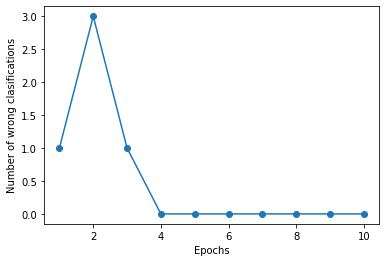

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
class Perceptron(object):
   def __init__(self, rate = 0.01, niter = 10):
      self.rate = rate
      self.niter = niter
   def fit(self, X, y):
      self.weight = np.zeros(1 + X.shape[1])
      self.errors = []  
      for i in range(self.niter):
         err = 0
         for xi, target in zip(X, y):
            delta_w = self.rate * (target - self.predict(xi))
            self.weight[1:] += delta_w * xi
            self.weight[0] += delta_w
            err += int(delta_w != 0.0)
         self.errors.append(err)
      return self
   def net_input(self, X):
      return np.dot(X, self.weight[1:]) + self.weight[0]
   def predict(self, X):
      return np.where(self.net_input(X) >= 0.0, 1, -1)
class AdalineGD(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    def activation(self, X):
        return self.net_input(X)
    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-versicolor', -1, 1)
X = df.iloc[0:100, [0,1,2,3]].values
pn = Perceptron()
pn.fit(X, y)
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of wrong clasifications')
plt.show()

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

ppn = Perceptron()
ppn.fit(X_train, y_train)
y_pred = ppn.predict(X_test)

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-versicolor', 0, 1)
X = df.iloc[0:100, [0,1,2,3]].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from mlxtend.classifier import Adaline
ppn = Adaline(epochs=20,eta=0.1, random_seed=1)
ppn.fit(X_train, y_train)
y_pred = ppn.predict(X_test)

4 features

In [45]:
print('Perceptron\n\nwrongly classified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Confusion matrix: \n%s' % confusion_matrix(y_test, y_pred))
print('\nAdaline\n\nwrongly classified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Confusion matrix: \n%s' % confusion_matrix(y_test, y_pred))

Perceptron

wrongly classified samples: 0
Accuracy: 1.00
Confusion matrix: 
[[15  0]
 [ 0 15]]

Adaline

wrongly classified samples: 0
Accuracy: 1.00
Confusion matrix: 
[[15  0]
 [ 0 15]]


REFERENCES :
1. Page 28(Python Machine Learning Textbook)
2. Stackoverflow.com
3. https://archive.ics.uci.edu/ml/datasets/iris
4. https://towardsdatascience.com/perceptron-learning-algorithm-d5db0deab975